In [66]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [67]:
df=pd.read_csv('merged_df.csv')
df.head(3)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rate                 65 non-null     float64
 1   UNRATE               65 non-null     float64
 2   10-Y Treasury Yield  65 non-null     float64
 3   year                 65 non-null     int64  
 4   GDP_PCH              65 non-null     float64
 5   CPI_PCH              65 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.2 KB
None


In [68]:
X=df[['Rate','UNRATE','10-Y Treasury Yield','GDP_PCH']]
y=df['CPI_PCH']
df

,Rate,UNRATE,10-Y Treasury Yield,year,GDP_PCH,CPI_PCH
0,3.215833,5.541667,3.946064,1960,3.97351,1.7
1,1.955000,6.691667,4.001566,1961,3.65563,1.0
2,2.708333,5.566667,4.187360,1962,7.41925,1.0
3,3.178333,5.641667,4.283695,1963,5.55205,1.3
4,3.496667,5.158333,4.925040,1964,7.37468,1.3
...,...,...,...,...,...,...
60,0.375833,8.091667,2.950562,2020,-0.86294,1.2
61,0.080000,5.350000,3.959000,2021,10.89751,4.7
62,1.683333,3.633333,4.179529,2022,9.82097,8.0
63,5.024167,3.625000,0.000000,2023,6.58986,4.1


In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

y_train = y_train.values.astype(np.float32).reshape(-1, 1)  
y_test = y_test.values.astype(np.float32).reshape(-1, 1)    



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train=X_train.values.astype(np.float32) 
X_test=X_test.values.astype(np.float32)

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

print("Data type of X_train:", X_train.dtype)

print(X_train.dtype) 


print("NaN in X_train:", np.isnan(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("NaN in X_test:", np.isnan(X_test).any())
print("NaN in y_test:", np.isnan(y_test).any())

print("Infinite in X_train:", np.isinf(X_train).any())
print("Infinite in y_train:", np.isinf(y_train).any())
print("Infinite in X_test:", np.isinf(X_test).any())
print("Infinite in y_test:", np.isinf(y_test).any())



model=Sequential()
model.add(Dense(15,activation='relu',input_shape=(4,)))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)


loss=model.evaluate(X_test,y_test)
predictions=model.predict(X_test)

(52, 4)
(52, 1)
(13, 4)
(13, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Data type of X_train: float32
float32
NaN in X_train: False
NaN in y_train: False
NaN in X_test: False
NaN in y_test: False
Infinite in X_train: False
Infinite in y_train: False
Infinite in X_test: False
Infinite in y_test: False
Epoch 1/100


/Users/rachitsanjel/Desktop/Data_analysis/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 18.7226 - val_loss: 38.8320
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.1243 - val_loss: 35.8703
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.8506 - val_loss: 33.0713
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.2072 - val_loss: 30.4452
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5890 - val_loss: 27.9845
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2863 - val_loss: 25.6630
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6460 - val_loss: 23.4796
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5329 - val_loss: 21.4890
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5105 - val_loss: 19.6497
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2785 - val_loss: 17.9432
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8048 - val_loss: 16.3957
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0174 - val_loss: 1

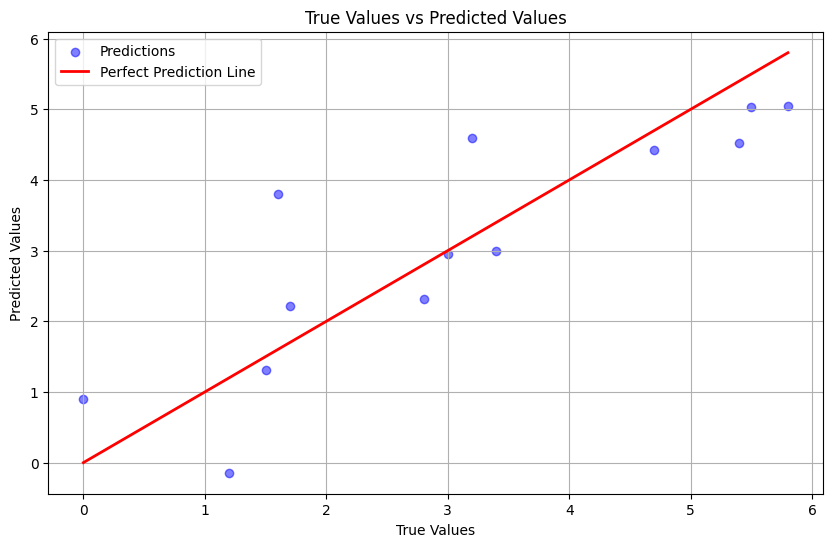

In [70]:
y_test_flat = y_test.flatten()
predictions_flat = predictions.flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, predictions_flat, color='blue', label='Predictions', alpha=0.5)
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [71]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_flat, predictions_flat)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_flat, predictions_flat)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test_flat, predictions_flat, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r2 = r2_score(y_test_flat, predictions_flat)
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 0.7601158618927002
Mean Squared Error (MSE): 0.907139241695404
Root Mean Squared Error (RMSE): 0.9524385929107666
R-squared: 0.7128660678863525


/Users/rachitsanjel/Desktop/Data_analysis/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 15)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 995 (3.89 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 664 (2.60 KB)